In [109]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

In [110]:
df = pd.read_excel("Data/Pima Indians Diabetes.xlsx")

In [111]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic BP,Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),BMI,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [112]:
df.rename(columns={'Plasma glucose concentration a 2 hours in an oral glucose tolerance test':'Plasma_Glucose','Triceps skin fold thickness (mm)':'Skin_Thickness'}, inplace=True)

In [113]:
df.head()

,Number of times pregnant,Plasma_Glucose,Diastolic BP,Skin_Thickness,2-Hour serum insulin (mu U/ml),BMI,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [114]:
df.rename(columns={'Number of times pregnant':'Count_Pregnancy','2-Hour serum insulin (mu U/ml)':'Serum_Inlusin','Diabetes pedigree function':'DPedigree'},inplace=True)

In [115]:
df.head()

,Count_Pregnancy,Plasma_Glucose,Diastolic BP,Skin_Thickness,Serum_Inlusin,BMI,DPedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
df.rename(columns={'Serum_Inlusin':'Serum_Insulin'}, inplace=True)

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count_Pregnancy,768,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plasma_Glucose,768,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Diastolic BP,768,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin_Thickness,768,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Serum_Insulin,768,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPedigree,768,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [118]:
df

,Count_Pregnancy,Plasma_Glucose,Diastolic BP,Skin_Thickness,Serum_Insulin,BMI,DPedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [61]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
use_cols=['Serum_Insulin','DPedigree'] #tried to use 2 cols to predict, score lowers to 69%
X = df.ix[:,:-1].values #using all columns
y = df.Class.values #using class as a columns to predict
#Names = iris.iris_type
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)
# Train KNN classifier defined function on the train data
myknn = KNeighborsClassifier(14).fit(X_train,y_train)


In [62]:
#Using KNN to predict
myknn.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
# Score using KNN is 79%
myknn.score(X_test, y_test)

0.79220779220779225

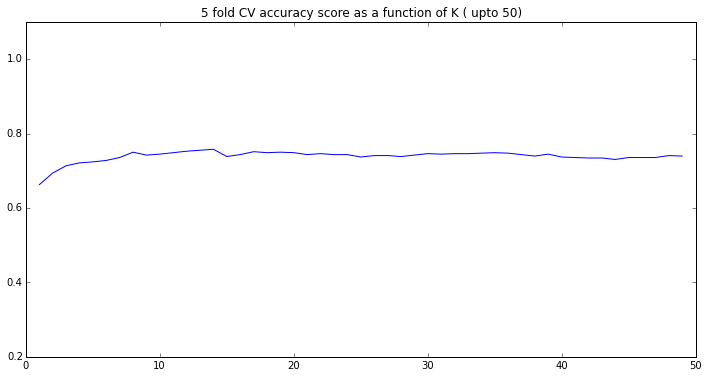

In [90]:
from sklearn.cross_validation import cross_val_score
import pandas.io.data
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# START HERE
n_neighbors = range(1,50,1)
scores = []
data = df.ix[:,:-1].values #using all columns
label = df.Class.values
#Loop through each value for n and calculate the score, appending to our list
for n in n_neighbors:
   model_n = KNeighborsClassifier(n)
   score = np.mean(cross_val_score(model_n, data, label, cv=5))
   scores.append(score)


#Step 2: Put the scores and values for K in a dataframe

df_results = pd.DataFrame(n_neighbors, columns=['n'])
df_results['scores'] = scores


#Step 3: Plot them!
fig = plt.figure(figsize=(12,6))
plt.title('5 fold CV accuracy score as a function of K ( upto 50)')
plt.ylim(0.2,1.1)
_=plt.plot(df_results.n, df_results.scores)


In [119]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

x = df.ix[:,:-1].values #using all columns
y = df.Class.values
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
# instantiate the vectorizer ( use variable name as vect)
#vect = CountVectorizer(decode_error = 'ignore')
#print X_train.shape
#print X_train[1]
#vect.fit(X_train)
#vect.get_feature_names()
#df.head(5)


In [122]:
# train a Naive Bayes model using train_dtm

nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
preds

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [124]:
# compare predictions to true labels
from sklearn import metrics

print metrics.accuracy_score(y_test, preds)
print metrics.confusion_matrix(y_test, preds)

0.541666666667
[[75 48]
 [40 29]]
